연습용

Python Data Science Handbook by Jake Vander Plas(O'Reilly). Copyright 2017 Jake VanderPlas, 978-1-491-91205-8

### 파이썬 정수는 정수 이상이다

- 파이썬의 정수는 C 구조체로 구성되어 있음

struct _longobject {

    long ob_refcnt; 파이썬이 메모리 할당과 해제를 처리할 수 있게 돕는 참조 횟수
    
    PyTypeObject * ob_type; 변수 타입을 인코딩
    
    size_t ob_size; 다음 데이터 멤버의 크기를 지정
    
    long ob_digit[1]; 파이썬 변수가 나타내는 실제 정숫값을 포함
    
}

- 위와 같이 타입에 대한 객체로 관리하기 때문에 동적 타이핑이 가능
- 유연하지만 더 느리다

### 파이썬 리스트는 리스트 이상이다
- 동적타이핑으로 인해 리스트는 서로 다른 데이터 타입의 요소를 담는 리스트를 만들 수 있다

In [1]:
L = list(range(10))
L

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [2]:
L2 = [str(c) for c in L]
L2

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [3]:
L3 = [1, True, "3", '4']
L3

[1, True, '3', '4']

### 파이썬의 고정 타입 배열
- 데이터를 효율적인 고정 타입 데이터 버퍼에 저장하는 다양한 방식을 제공

In [4]:
import array
L = list(range(10))
A = array.array('i', L) # python 3.3 + 
A

array('i', [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

파이썬의 array 객체는 배열 기반의 데이터에 효율적인 저장소를 제공하는 반면, Numpy는 그 데이터에 효율적인 연산을 추가한다. 

In [5]:
import numpy as np

### 파이썬 리스트에서 배열 만들기
- 파이썬 리스트와 달리 NumPy는 배열의 모든 요소가 같은 타입이어야 한다
- 타입이 일치하지 않으면 NumPy는 가능한 경우 상위 타입을 취하게 된다

In [6]:
a = np.array([1,4,2,5,3])
print(a)
b = np.array([1.3,4,2,5,3]) ## 상위 타입인 부동소수점으로 변환됨
print(b)
c = np.array([1.3,4,2,5,3], dtype='float32')
print(c)
d = np.array([1.3,4,2,5,3], dtype='int')
print(d)

[1 4 2 5 3]
[1.3 4.  2.  5.  3. ]
[1.3 4.  2.  5.  3. ]
[1 4 2 5 3]


파이썬 리스트와는 달리 NumPy 배열은 명시적으로 다차원이 가능하다.

In [7]:
np.array([range(i, i+3) for i in [2,4,6]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [8]:
np.array([[2,3,4],[4,5,6],[6,7,8]])

array([[2, 3, 4],
       [4, 5, 6],
       [6, 7, 8]])

In [9]:
list([[2,3,4],[4,5,6],[6,7,8]])

[[2, 3, 4], [4, 5, 6], [6, 7, 8]]

### 처음부터 배열 만들기
규모가 큰 배열의 경우에는 NumPy에 내장된 루틴을 사용해 처음부터 배열을 생성하는 것이 효율적이다

In [10]:
# 0으로 채운 길이 10의 정수 배열 만들기
np.zeros(10, dtype=int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [11]:
# 1로 채운 3x5 부동 소수점 배열 만들기
np.ones((3,5), dtype=int)

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]])

In [12]:
# 3.14로 채운 3x5 배열 만들기
np.full((3,5), 3.14)

array([[3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14],
       [3.14, 3.14, 3.14, 3.14, 3.14]])

In [13]:
# 선형 수열로 채운 배열 만들기
# 0에서 시작해 2씩 더해 20까지 채움
# 내장 함수인 range와 유사
np.arange(0, 20, 2)

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [14]:
# 0과 1 사이에 일정한 간격을 가진 다섯 개의 값으로 채운 배열 만들기
np.linspace(0, 1, 5)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [15]:
# 0과 1 사이의 난수로 채움
np.random.random((3,3))

array([[0.48658527, 0.35623418, 0.06701896],
       [0.95514164, 0.93111998, 0.27376118],
       [0.69812136, 0.36408907, 0.34195627]])

In [16]:
# 정규 분포(평균=0, 표준 편차=1)의 난수로 채운 3x3 배열 만들기
np.random.normal(0,1, (3,3))

array([[-0.84497831, -0.65421988,  0.1698275 ],
       [-1.16193471, -0.45930214, -0.57453741],
       [ 0.47950974, -1.2742066 , -0.51565746]])

In [17]:
# [0,10] 구간의 임의의 정수로 채운 3x3 배열 만들기
np.random.randint(0, 10, (3,3))

array([[7, 7, 6],
       [5, 7, 0],
       [1, 7, 3]])

In [18]:
# 3x3 단위 행렬 만들기
np.eye(3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [19]:
# 세 개의 정수를 가지는 초기화되지 않은 배열 만들기
# 값을 해당 메모리 위치에 이미 존재하고 있는 값으로 채움
np.empty(3)

array([1., 1., 1.])

## NumPy 배열의 기초
Pandas도 NumPy 배열을 기반으로 만들어졌다. 

##### 배열 속성 지정
배열의 크기, 모양, 메모리 소비량, 데이터 타입을 결정
##### 배열 인덱싱
개별 벼열 요솟값을 가져오고 설정
##### 배열 슬라이싱
큰 배열 내에 있는 작은 하위 배열을 가져오고 설정
##### 배열 재구조화
해당 배열의 형상을 변경
##### 배열 결합 및 분할
여러 배열을 하나로 결합하고 하나의 배열을 여러 개로 분할

### NumPy 배열 속성 지정

In [20]:
# 항상 같은 난수가 생성될 수 있도록 난수 코드를 지정
np.random.seed(0) 

x1 = np.random.randint(10, size=6)
x2 = np.random.randint(10, size=(3,4))
x3 = np.random.randint(10, size=(3,4,5))

print(x1.ndim)  # 배열의 차원
print(x2.shape) # 배열의 모양
print(x3.size)  # 배열의 크기
print(x3.dtype) # 배열의 데이터 타입
print(x3.itemsize) # 배열의 요소의 크기를 바이트 단위로
print(x3.nbytes) # 배열의 전체 크기를 바이트 단위로

1
(3, 4)
60
int32
4
240


### 배열 인덱싱: 단일 요소에 접근하기

In [21]:
# 일차원 배열의 접근
print(x1)
print(x1[0])
print(x1[-1])

[5 0 3 3 7 9]
5
9


In [22]:
# 다차원 배열의 접근
print(x2)
print(x2[0,0])
print(x2[2,-1])

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]
3
7


### 배열 슬라이싱: 하위 배열에 접근하기
콜론(:) 기호로 표시되는 슬라이스 표기법으로 하위 배열에 접근할 수 있다. NumPy 슬라이싱 구문은 표준 파이썬 리스트의 구문을 따른다. 

In [23]:
x= np.array(range(10))
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [24]:
print(x[1:3])
print(x[1:])
print(x[1:-2])
print(x[::2])
print(x[::-1])

[1 2]
[1 2 3 4 5 6 7 8 9]
[1 2 3 4 5 6 7]
[0 2 4 6 8]
[9 8 7 6 5 4 3 2 1 0]


### 사본이 아닌 뷰로서의 하위 배열
배열 슬라이스가 배열 데이터의 사본(copy)가 아니라 뷰(view)를 반환한다는 점. 이는 NumPy 배열 슬라이싱이 파이썬 리스트 슬라이싱과 다른 점 중 하나. 리스트에서 슬라이스는 사본이다. 

In [25]:
print(x2)
sliceX2 = x2[:2,:2]
sliceX2

[[3 5 2 4]
 [7 6 8 8]
 [1 6 7 7]]


array([[3, 5],
       [7, 6]])

In [26]:
sliceX2[0,0] = 99
print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


In [27]:
# copy 명령을 이용하여 복사를 할 수 있음
sliceX2 = x2[:2,:2].copy()
sliceX2[0,0] = 123

print(x2)

[[99  5  2  4]
 [ 7  6  8  8]
 [ 1  6  7  7]]


### 배열 재구조화
배열의 형상을 변경. reshape()

In [28]:
# 배열의규모가 변경될 규모와 일치해야 한다 (가능하면 뷰를 사용하지만 연속되지 않은 메모리 버퍼일 경우에는 복사가 이루어질 수도 있음)
x1 = np.arange(1, 10)
x2 = x1.reshape(3, 3)

print(x1)
print(x2)

[1 2 3 4 5 6 7 8 9]
[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [29]:
x = np.array([1,2,3])
x

array([1, 2, 3])

In [30]:
x.reshape(1,3)

array([[1, 2, 3]])

In [31]:
x[np.newaxis, :]

array([[1, 2, 3]])

In [32]:
x.reshape(3,1)

array([[1],
       [2],
       [3]])

In [33]:
x[:, np.newaxis]

array([[1],
       [2],
       [3]])

### 배열 연결 및 분할
하나의 배열을 여러 개의 배열로 분할하는 것도 가능

##### 배열 연결

In [34]:
x = np.array([1,2,3])
y = np.array([3,2,1])
np.concatenate([x,y])

array([1, 2, 3, 3, 2, 1])

In [35]:
grid = np.array([[1,2,3],
                [4,5,6]])

np.concatenate([grid, grid]) # 기본 axis= 0

array([[1, 2, 3],
       [4, 5, 6],
       [1, 2, 3],
       [4, 5, 6]])

In [36]:
np.concatenate([grid,grid], axis=1)

array([[1, 2, 3, 1, 2, 3],
       [4, 5, 6, 4, 5, 6]])

In [37]:
x = np.array([1,2,3])
grid = np.array([
                 [9,8,7],
                 [6,5,4]
                ])

In [38]:
np.vstack([x, grid])

array([[1, 2, 3],
       [9, 8, 7],
       [6, 5, 4]])

In [39]:
y = np.array([[99],
              [99]])
np.hstack([y,grid])

array([[99,  9,  8,  7],
       [99,  6,  5,  4]])

### 배열 분할하기

In [40]:
x = [1, 2, 3, 99, 99, 3, 2, 1]
x1, x2, x3, x4 = np.split(x, [3,5,6])
print(x1, x2, x3, x4)

[1 2 3] [99 99] [3] [2 1]


In [41]:
grid = np.arange(16).reshape((4,4))
grid

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

In [42]:
upper, lower = np.vsplit(grid, [2])
print(upper)
print(lower)

[[0 1 2 3]
 [4 5 6 7]]
[[ 8  9 10 11]
 [12 13 14 15]]


In [43]:
left, right = np.hsplit(grid, [2])
print(left)
print(right)

[[ 0  1]
 [ 4  5]
 [ 8  9]
 [12 13]]
[[ 2  3]
 [ 6  7]
 [10 11]
 [14 15]]


### NumPy 배열 연산: 유니버설 함수

NumPy 배열의 연산을 빠르게 만드는 핵심은 벡터화(vectorized) 연산을 사용하는 것인데, 그것은 일반적으로 NumPy의 유니버설 함수를 통해 구현된다

##### 루프는 느리다
파이썬은 인터프리터 언어이기 때문에 느리다. JIT 컴파일 하는 파이썬. C코드로 변환하는 사이썬 프로젝트, 파이썬 코드 조각을 LLVM 바이트 코드로 변환하는 넘바 프로젝트가 있다(장단 점이 있다고 한다)

In [4]:
import numpy as np
np.random.seed(0)

def compute_reciprocals(values):
    output = np.empty(len(values))
    for i in range(len(values)):
        output[i] = 1.0 / values[i]
    return output

values = np.random.randint(1, 100, size=1000000)
%timeit compute_reciprocals(values) # 크기를 키우고 성능 테스트를 할 경우 매우 느림을 알 수 있음

2.13 s ± 125 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### UFuncs

여러 종류의 연산에 대해 컴파일된 루틴에 편리한 인터페이스를 제공. 이를 벡터화 연산이라고 한다. 
간단히 배열에 연산을 수행해 각 요소에 적용함으로써 수행할 수 있다. 루프를 NumPy의 기저를 이루는 컴파일된 계층으로 밀어 넣음으로써 빠르게 실행되도록 설계 됐다. 

In [7]:
%timeit print(1.0/values)

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...

  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
[ 0.02222222  0.02083333  0.01538462 ...,  0.01075269  0.01612903
  0.05263158]
5.29 ms ± 76.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [8]:
np.arange(1,6)

array([1, 2, 3, 4, 5])

##### 집계함수
- np.sum 요소의 합 계산
- np.prod 요소의 곱 계산
- np.mean 요소의 평균 계산
- np.std 표준 편차 계산
- np.var 분산 계싼
- np.min 최솟값 찾기
- np.max 최댓값 찾기
- np.argmin 최솟값의 인덱스
- np.argmax 최댓값의 인덱스
- np.median 중앙값
- np.percentile 요소의 순위 기반 백분위 수 계산
- np.any 요소 중 참이 있는지 검사

- np.all 모든 요소가 참인지 검사

### 배열 연산: 브로드 캐스팅
벡터화 연산의 또 다른 방법. 다른 크기의 배열에 이항 유니버설 함수를 적용하기 위한 규칙의 집합

In [3]:
import numpy as np
a = np.array([0,1,2])
b = np.array([5,5,5])
a + b

array([5, 6, 7])

In [5]:
a + 5 # 값 5가 더 높은 차원으로 확장하고 연산됨

array([5, 6, 7])

In [8]:
M = np.ones((3,3))
M

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [12]:
M + a


array([[1., 2., 3.],
       [1., 2., 3.],
       [1., 2., 3.]])

두 배열 모두 브로드 캐스팅

In [10]:
a = np.arange(3)
b = np.arange(3)[:,np.newaxis]
print(a)
print(b)

[0 1 2]
[[0]
 [1]
 [2]]


In [11]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

### 브로드 캐스팅 규칙

- 두 배열의 차원 수가 다르면 더 작은 수의 차원을 가진 배열 형상의 앞쪽(왼쪽)을 1로 채운다
- 두 배열의 형상이 어떤 차원에서도 일치하지 않는다면 해당 차원의 형상이 1인 배열이 다른 형상과 일차하도록 늘어난다
- 임의의 차원에서 크기가 일치하지 않고 1도 아니라면 오류가 발생한다

In [26]:
M = np.ones((2,3))
a = np.arange(3)

a.shape

(3,)

In [27]:
M + a

array([[1., 2., 3.],
       [1., 2., 3.]])

In [32]:
a = np.arange(3).reshape(3,1) 
b = np.arange(3)

In [33]:
a + b

array([[0, 1, 2],
       [1, 2, 3],
       [2, 3, 4]])

In [39]:
M = np.ones((3,2))
a = np.arange(3)

try:
    M + a
except:
    print('-> (3,2)와 (1,3)')
    print('-> (3,2)와 (3,3) 은 맞지 않음')


-> (3,2)와 (1,3)
-> (3,2)와 (3,3) 은 맞지 않음


In [43]:
M + a[:,np.newaxis]

array([[1., 1.],
       [2., 2.],
       [3., 3.]])

In [45]:
# +, - 연산자 뿐만 아니라log(exp(a) + exp(b)) 등에서도 브로드캐스팅 규칙이 적용된다
np.logaddexp(M, a[:,np.newaxis])

array([[1.31326169, 1.31326169],
       [1.69314718, 1.69314718],
       [2.31326169, 2.31326169]])

### 실전 브로드캐스팅
자주쓰이는 예제

##### 배열을 중앙 정렬하기

In [47]:
X = np.random.random((10,3))
Xmean = X.mean(0)
Xmean

array([0.56558108, 0.50291737, 0.49036772])

In [49]:
X_centered = X - Xmean
X_centered

array([[ 0.01186381, -0.02616748, -0.4743123 ],
       [ 0.18054553, -0.03204152, -0.15513852],
       [ 0.06139218, -0.20218172,  0.41317506],
       [-0.11001156,  0.4329564 ,  0.06158358],
       [ 0.04475067, -0.14518391, -0.41346757],
       [ 0.40218402,  0.00447306,  0.36290134],
       [ 0.20298778,  0.38407287,  0.343926  ],
       [-0.10390574, -0.24635882, -0.22185985],
       [-0.36551986, -0.39671447, -0.30463531],
       [-0.32428684,  0.2271456 ,  0.38782758]])

In [51]:
X_centered.mean(0)

array([ 1.11022302e-17,  5.55111512e-17, -3.33066907e-17])

### 2차원 함수 플로팅하기

In [52]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]
z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [53]:
%matplotlib inline

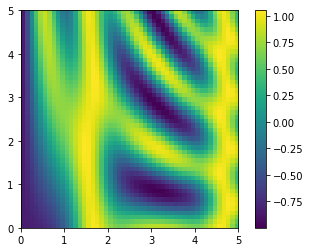

In [54]:
import matplotlib.pyplot as plt
plt.imshow(z, origin='lower', extent=[0, 5, 0, 5], cmap='viridis')
plt.colorbar()

### 비교, 마스크, 부울로직
NumPy 배열 내의 값을 검사하고 조작하는 데 부울 마스크를 사용하는 법을 다룬다. 마스킹은 특정 기준에 따라 배열의 값을 추출하거나 수정, 계산, 조작할 때 사용.

특정 값보다 더 큰 값을 모두 세거나 특정 임계치를 넘어서는 이상치를 모두 제거하려는 경우가 여기에 해당한다.

##### 비온 날 세기

In [57]:
import numpy as np
import pandas as pd

rainfall = pd.read_csv('data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254
inches.shape

(365,)

In [58]:
%matplotlib inline

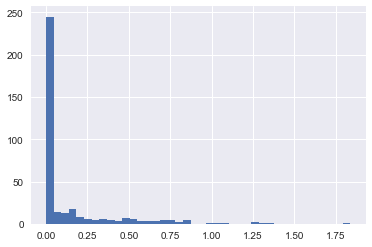

In [65]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.hist(inches, 40);

### ufunc으로서의 비교 연산자
배열의 요소 단위의 연산 뿐만 아니라 비교 연산자도 지원한다. 비교 연산자의 결과는 항상 Bool 타입의 배열
- <    np.equal
- \>    np.greater
- \>=   np.greater_equal
- <=   np.less_equal
- !=   np.not_equal

In [76]:
a = np.random.randint(10, size=(3,4))
a

array([[8, 8, 9, 4],
       [2, 5, 3, 1],
       [4, 0, 3, 7]])

In [78]:
a > 5

array([[ True,  True,  True, False],
       [False, False, False, False],
       [False, False, False,  True]])

### 부울 배열로 작업하기
